In [263]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
import pymannkendall as mk

In [264]:
# read in the original csvs

CO2_emission = pd.read_csv('ghg-emissions CO2.csv', skipfooter=2, engine='python')
CH4_emission = pd.read_csv('ghg-emissions(1) CH4.csv', skipfooter=2, engine='python')
N2O_emission = pd.read_csv('ghg-emissions(2) N2O.csv', skipfooter=2, engine='python')
sector_emission = pd.read_csv('ghg-emissions-by-sector 1990.csv')

In [265]:
CO2_emission

,iso,Country/Region,unit,1850,1851,1852,1853,1854,1855,1856,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,WORLD,World,MtCO2e,204.0,207.0,217.0,227.0,267.0,272.0,291.0,...,34600.0,35000.0,35100.0,35000.0,35600.0,36400.0,36600.0,35100.0,36900.0,37100.0


In [266]:
CH4_emission

,iso,Country/Region,unit,1850,1851,1852,1853,1854,1855,1856,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,WORLD,World,MtCO2e,1105.0,1107.5,1115.0,1120.0,1132.5,1137.5,1145.0,...,7425.0,7425.0,7475.0,7475.0,7550.0,7625.0,7650.0,7650.0,7725.0,7750.0


In [267]:
N2O_emission

,iso,Country/Region,unit,1850,1851,1852,1853,1854,1855,1856,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,WORLD,World,MtCO2e,133.21,135.89,138.27,140.66,143.04,144.83,146.91,...,2938.28,2947.22,2944.24,2980.0,3039.6,3069.4,3069.4,3099.2,3158.8,3188.6


In [268]:
sector_emission

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,10780000.0,87290000.0,2540000.0,3600000.00,1680000.0,1260000.0,2069999.9,5130000.0,700000.0,410000.0,129999.99
6556,Zimbabwe,ZWE,2018,10870000.0,87380000.0,2590000.0,3610000.00,1830000.0,1560000.0,2710000.0,5430000.0,710000.0,480000.0,160000.00
6557,Zimbabwe,ZWE,2019,10620000.0,87330000.0,2640000.0,3530000.00,1810000.0,1630000.0,2320000.0,5020000.0,730000.0,440000.0,160000.00
6558,Zimbabwe,ZWE,2020,9760000.0,87210000.0,2690000.0,3650000.00,1900000.0,1420000.0,1580000.0,3870000.0,750000.0,500000.0,60000.00


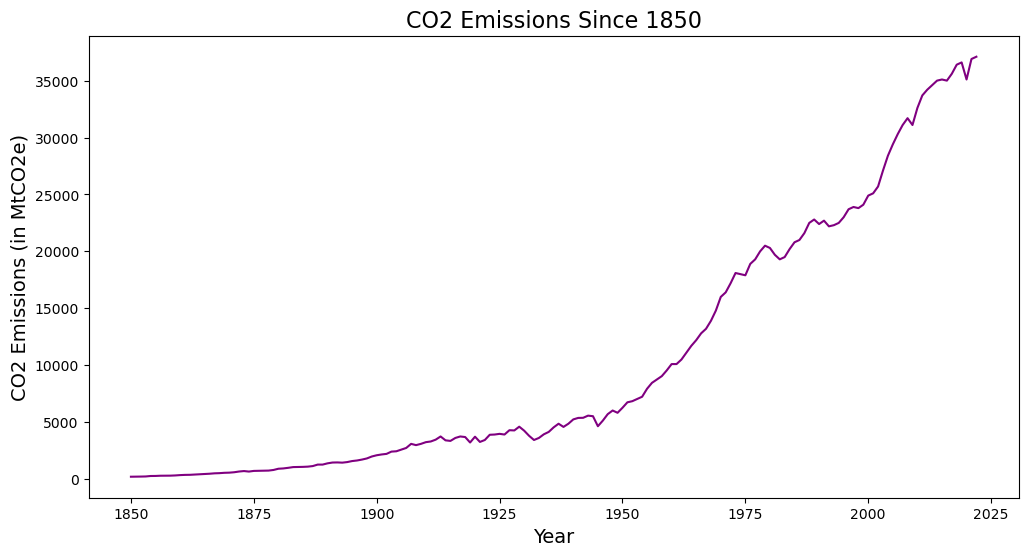

In [269]:
# Melt the CO2 dataframe
meltedCO2_df = CO2_emission.melt(id_vars=['iso', 'Country/Region', 'unit'], 
                    var_name='Year', 
                    value_name='Emissions')

# Drop the 'iso' and 'unit' columns
meltedCO2_df = meltedCO2_df.drop(columns=['iso', 'unit'])

# Convert 'Year' to an integer
meltedCO2_df['Year'] = meltedCO2_df['Year'].astype(int)

world_data = meltedCO2_df[meltedCO2_df['Country/Region'] == 'World']

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(world_data['Year'], world_data['Emissions'], label='World', color='purple')

# Add the labels and title
plt.title('CO2 Emissions Since 1850', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CO2 Emissions (in MtCO2e)', fontsize=14)
plt.grid(False)
plt.show()

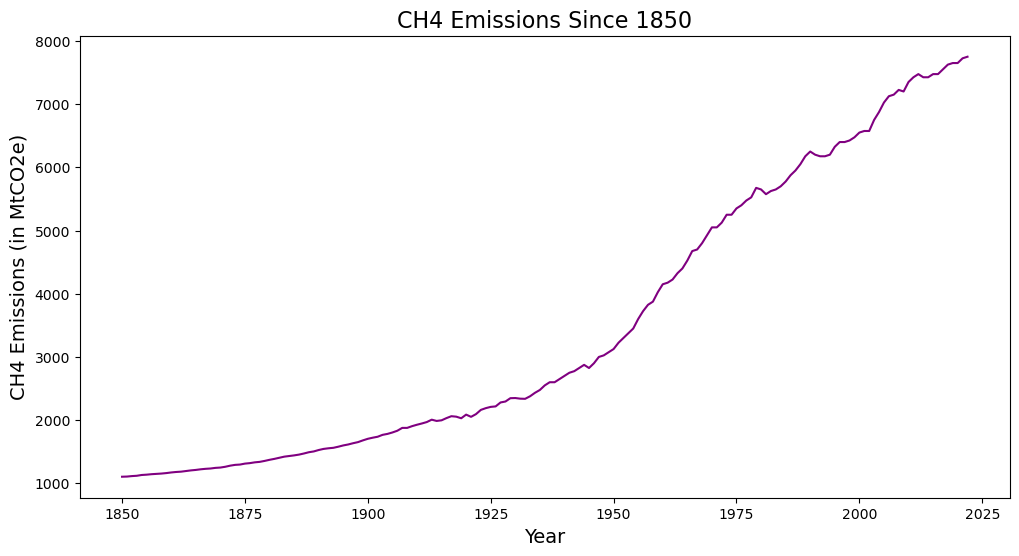

In [278]:
# repeat for Methane and Nitrous Oxide

meltedCH4_df = CH4_emission.melt(id_vars=['iso', 'Country/Region', 'unit'],
                                var_name='Year',
                                value_name='Emissions')

meltedCH4_df = meltedCH4_df.drop(columns=['iso', 'unit'])

meltedCH4_df['Year'] = meltedCH4_df['Year'].astype(int)

world_data2 = meltedCH4_df[meltedCH4_df['Country/Region'] == 'World']

plt.figure(figsize=(12,6))
plt.plot(world_data2['Year'], world_data2['Emissions'], label='World', color='purple')

plt.title('CH4 Emissions Since 1850', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CH4 Emissions (in MtCO2e)', fontsize=14)
plt.grid(False)

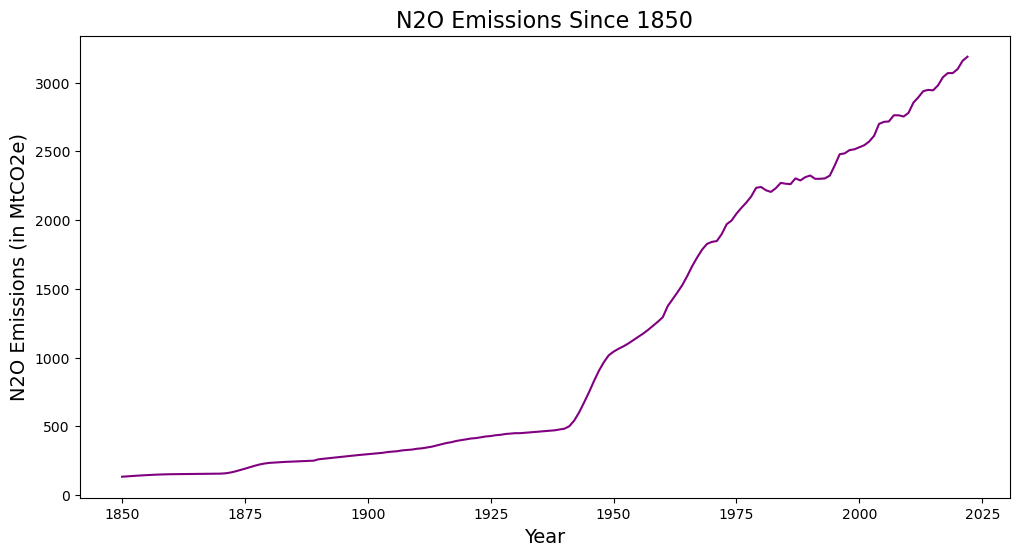

In [279]:
meltedN2O_df = N2O_emission.melt(id_vars=['iso', 'Country/Region', 'unit'],
                                 var_name='Year',
                                 value_name='Emissions')

meltedN2O_df = meltedN2O_df.drop(columns=['iso', 'unit'])

meltedN2O_df['Year'] = meltedN2O_df['Year'].astype(int)

world_data3 = meltedN2O_df[meltedN2O_df['Country/Region'] == 'World']

plt.figure(figsize=(12,6))
plt.plot(world_data3['Year'], world_data3['Emissions'], label='World', color='purple')

plt.title('N2O Emissions Since 1850', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('N2O Emissions (in MtCO2e)', fontsize=14)
plt.grid(False)
plt.show()

In [280]:
meltedCH4_df

,Country/Region,Year,Emissions
0,World,1850,1105.0
1,World,1851,1107.5
2,World,1852,1115.0
3,World,1853,1120.0
4,World,1854,1132.5
...,...,...,...
168,World,2018,7625.0
169,World,2019,7650.0
170,World,2020,7650.0
171,World,2021,7725.0


In [281]:
# set up lists for pearson correlation

CO2_Year = meltedCO2_df['Year']
CO2_Emission = meltedCO2_df['Emissions']

CH4_Year = meltedCH4_df['Year']
CH4_Emission = meltedCH4_df['Emissions']

N2O_Year = meltedN2O_df['Year']
N2O_Emission = meltedN2O_df['Emissions']


In [282]:
# Apply the pearson correlation  

corr, _ = pearsonr(CO2_Year, CO2_Emission)
corr2, _ = pearsonr(CH4_Year, CH4_Emission)
corr3, _ = pearsonr(N2O_Year, N2O_Emission)

In [283]:
# print every result

print('CO2 Pearsons correlation: %.3f' % corr)
print('CH4 Pearsons correlation: %.3f' % corr2)
print('N2O Pearsons correlation: %.3f' % corr3)

CO2 Pearsons correlation: 0.914
CH4 Pearsons correlation: 0.959
N2O Pearsons correlation: 0.937


In [284]:
# Since the next dataset only includes 1990-2021 in the dataset, we want to establish the same linear relationship
# exists in the same year period as in the 1850-2024 datasete

CO2_Year_1990 = meltedCO2_df.loc[(meltedCO2_df['Year'] >= 1990) & (meltedCO2_df['Year'] <= 2021), 'Year']
CO2_Emission_1990 = meltedCO2_df.loc[(meltedCO2_df['Year'] >= 1990) & (meltedCO2_df['Year'] <= 2021), 'Emissions']

CH4_Year_1990 = meltedCH4_df.loc[(meltedCH4_df['Year'] >= 1990) & (meltedCH4_df['Year'] <= 2021), 'Year']
CH4_Emission_1990 = meltedCH4_df.loc[(meltedCH4_df['Year'] >= 1990) & (meltedCH4_df['Year'] <= 2021), 'Emissions']

N2O_Year_1990 = meltedN2O_df.loc[(meltedN2O_df['Year'] >= 1990) & (meltedN2O_df['Year'] <= 2021), 'Year']
N2O_Emission_1990 = meltedN2O_df.loc[(meltedN2O_df['Year'] >= 1990) & (meltedN2O_df['Year'] <= 2021), 'Emissions']

corr4, _ = pearsonr(CO2_Year_1990, CO2_Emission_1990)
corr5, _ = pearsonr(CH4_Year_1990, CH4_Emission_1990)
corr6, _ = pearsonr(N2O_Year_1990, N2O_Emission_1990)


In [285]:
# print every result

print('CO2 Pearsons correlation (1990-2021): %.3f' % corr4)
print('CH4 Pearsons correlation (1990-2021): %.3f' % corr5)
print('N2O Pearsons correlation (1990-2021): %.3f' % corr6)

CO2 Pearsons correlation (1990-2021): 0.980
CH4 Pearsons correlation (1990-2021): 0.983
N2O Pearsons correlation (1990-2021): 0.994


In [223]:
# Rename the columns to be simpler, also divide all of the values so they're represented in billions of tonnes

World_Emissions = sector_emission[sector_emission['Entity'] == 'World'].drop(['Entity', 'Code'], axis=1)
World_Emissions.iloc[:, 1:] = World_Emissions.iloc[:, 1:] / 1e9
World_Emissions = World_Emissions.rename(columns={"Greenhouse gas emissions from agriculture": "Agriculture", 
                                "Greenhouse gas emissions from land use change and forestry": "LULUCF",
                                "Greenhouse gas emissions from waste" : "Waste",
                                "Greenhouse gas emissions from buildings" : "Buildings",
                                "Greenhouse gas emissions from industry" : "Industry",
                                "Greenhouse gas emissions from manufacturing and construction" : "Manufacturing/Construction",
                                "Greenhouse gas emissions from transport" : "Transport",
                                "Greenhouse gas emissions from electricity and heat" : "Electricity/Heat",
                                "Fugitive emissions of greenhouse gases from energy production" : "Fugitive Energy Production",
                                "Greenhouse gas emissions from other fuel combustion" : "Other Fuel Consumption",
                                "Greenhouse gas emissions from bunker fuels" : "Aviation/Shipping"})

In [224]:
World_Emissions

,Year,Agriculture,LULUCF,Waste,Buildings,Industry,Manufacturing/Construction,Transport,Electricity/Heat,Fugitive Energy Production,Other Fuel Consumption,Aviation/Shipping
6432,1990,4.97552,2.02671,1.36440,2.88301,1.00353,3.98172,4.73358,8.652951,2.34590,0.76769,0.63790
6433,1991,4.94519,2.02671,1.39518,2.90884,1.00833,3.90472,4.77195,8.794410,2.35683,0.76863,0.64575
6434,1992,4.93822,2.02672,1.41828,2.79765,1.02375,3.77150,4.88010,8.953870,2.29298,0.68445,0.68347
6435,1993,4.90868,2.02715,1.44439,2.86417,1.04048,3.72129,4.92308,9.001820,2.29612,0.69687,0.67574
6436,1994,4.95229,2.02682,1.47096,2.77762,1.14902,3.73882,5.02140,9.101481,2.28639,0.66697,0.70206
6437,1995,5.00576,2.03242,1.47651,2.85482,1.22218,3.96640,5.15900,9.291650,2.35520,0.61835,0.72845
6438,1996,5.03631,1.82703,1.47831,2.91843,1.27384,3.85674,5.36920,9.649010,2.41798,0.54558,0.74910
6439,1997,4.96728,2.79653,1.47436,2.89922,1.32334,3.88229,5.44739,9.923490,2.43111,0.59412,0.77488
6440,1998,5.02193,2.12631,1.46628,2.74494,1.32781,3.88277,5.57393,10.147630,2.41689,0.57043,0.79945
6441,1999,5.07841,1.93522,1.46447,2.81690,1.33692,3.72637,5.73837,10.206809,2.39831,0.57964,0.84145


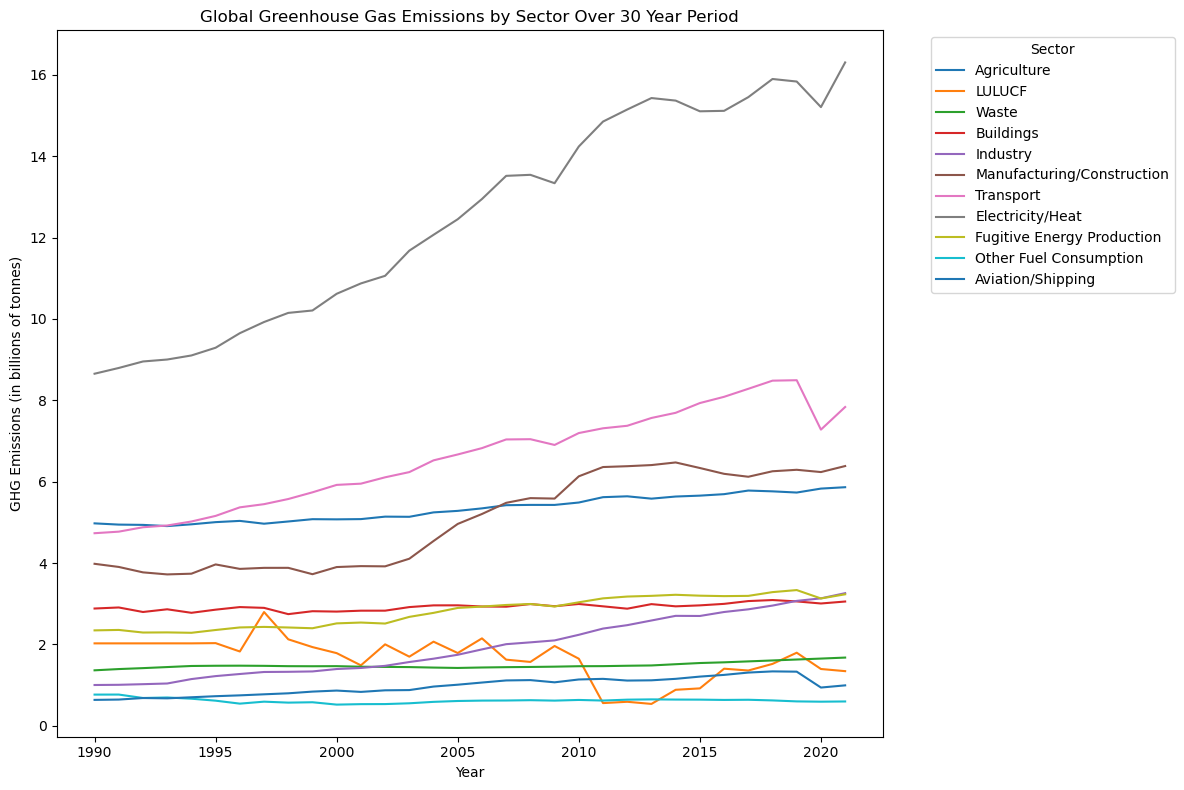

In [225]:
# setting Year to be the X-axis
line_plot = World_Emissions.set_index('Year')

# Create the line plot
plt.figure(figsize=(12, 8))
for column in line_plot.columns:
    plt.plot(line_plot.index, line_plot[column], label=column)

# Adding the labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GHG Emissions (in billions of tonnes)')
plt.title('Global Greenhouse Gas Emissions by Sector Over 30 Year Period')
plt.legend(title="Sector", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

In [226]:
# Function to apply a Mann-Kendall test to each sector
def mann_kendall_test(df):
    results = {}
    for sector in df.columns:
        # Extract values for the sector and run the Mann-Kendall test
        sector_data = df[sector]
        result = mk.original_test(sector_data)
        results[sector] = {
            'Trend': result.trend,      
            'p-value': result.p,          
            'S': result.s,                
        }
    return pd.DataFrame(results)

# Run the test
mann_kendall_results = mann_kendall_test(World_Emissions)

# Display the results
print(mann_kendall_results)

               Year Agriculture      LULUCF       Waste   Buildings  \
Trend    increasing  increasing  decreasing  increasing  increasing   
p-value         0.0         0.0    0.000113    0.000011    0.000001   
S             496.0       456.0      -239.0       272.0       308.0   

           Industry Manufacturing/Construction   Transport Electricity/Heat  \
Trend    increasing                 increasing  increasing       increasing   
p-value         0.0                        0.0         0.0              0.0   
S             494.0                      354.0       464.0            466.0   

        Fugitive Energy Production Other Fuel Consumption Aviation/Shipping  
Trend                   increasing               no trend        increasing  
p-value                        0.0               0.909622               0.0  
S                            424.0                    8.0             408.0  


In [227]:
# Identifying the top 3 Sectors in 2021

# World_Emissions['Manufacturing/Construction']
# World_Emissions['Transport']
# World_Emissions['Electricity/Heat']

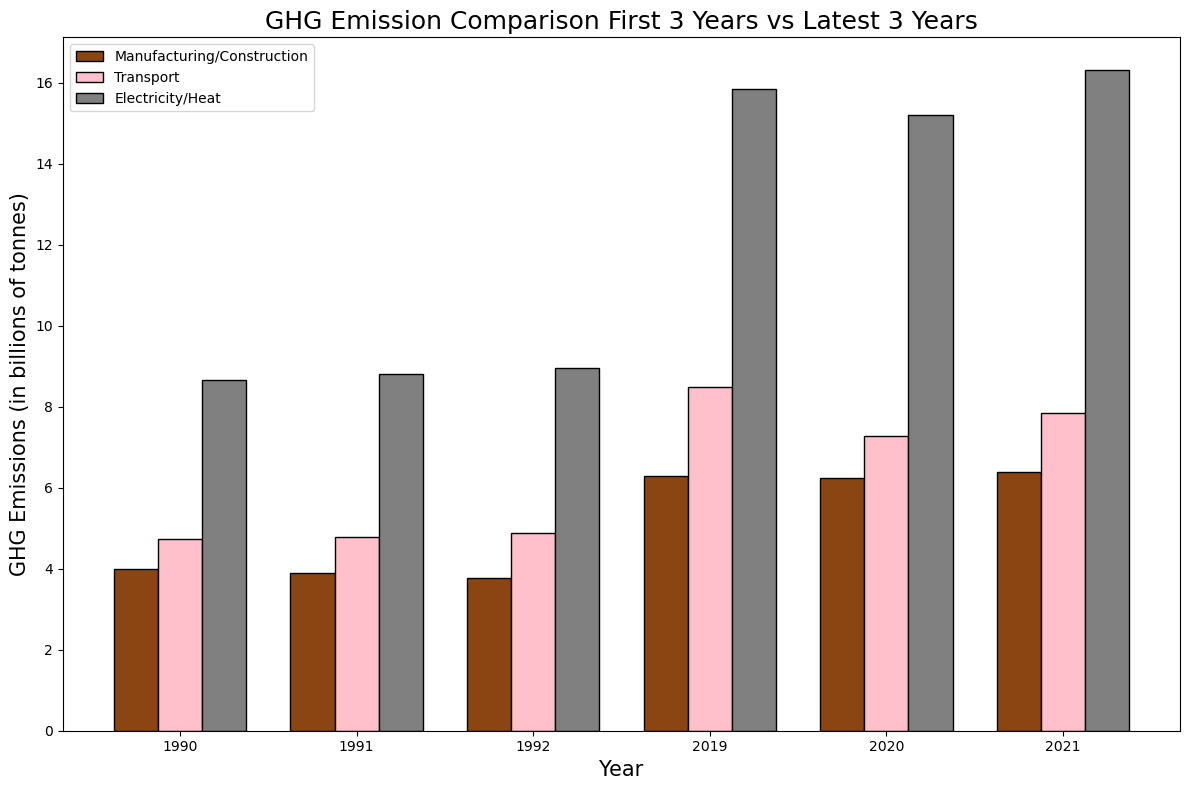

In [228]:
barWidth = 0.25

# Filtering the data for the first 3 years, and final 3 years observed in the dataset
filtered_data = World_Emissions[(World_Emissions['Year'] >= 1990) & (World_Emissions['Year'] <= 1992)
                                | (World_Emissions['Year'] >= 2019) & (World_Emissions['Year'] <= 2021)]

# Extracting the data for the bar plot
years = filtered_data['Year']
MFC = filtered_data['Manufacturing/Construction']
TSPT = filtered_data['Transport']
HEAT = filtered_data['Electricity/Heat']

# Setting positions of bars on the x-axis
br1 = np.arange(len(years))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2] 

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(br1, MFC, color='saddlebrown', width=barWidth, edgecolor='black', label='Manufacturing/Construction')
plt.bar(br2, TSPT, color='pink', width=barWidth, edgecolor='black', label='Transport')
plt.bar(br3, HEAT, color='grey', width=barWidth, edgecolor='black', label='Electricity/Heat')

# Add labels, title, and legend
plt.xlabel('Year', fontsize=15)
plt.ylabel('GHG Emissions (in billions of tonnes)', fontsize=15)
plt.title('GHG Emission Comparison First 3 Years vs Latest 3 Years', fontsize=18)
plt.xticks([r + barWidth for r in range(len(years))], years)  # Center ticks under groups

plt.legend()
plt.tight_layout()
plt.show()

                       Feature  Importance
8   Fugitive Energy Production    0.234447
7             Electricity/Heat    0.179410
0                  Agriculture    0.151819
6                    Transport    0.118068
4                     Industry    0.105684
10           Aviation/Shipping    0.086623
5   Manufacturing/Construction    0.073654
3                    Buildings    0.024348
2                        Waste    0.016216
1                       LULUCF    0.004996
9       Other Fuel Consumption    0.004734


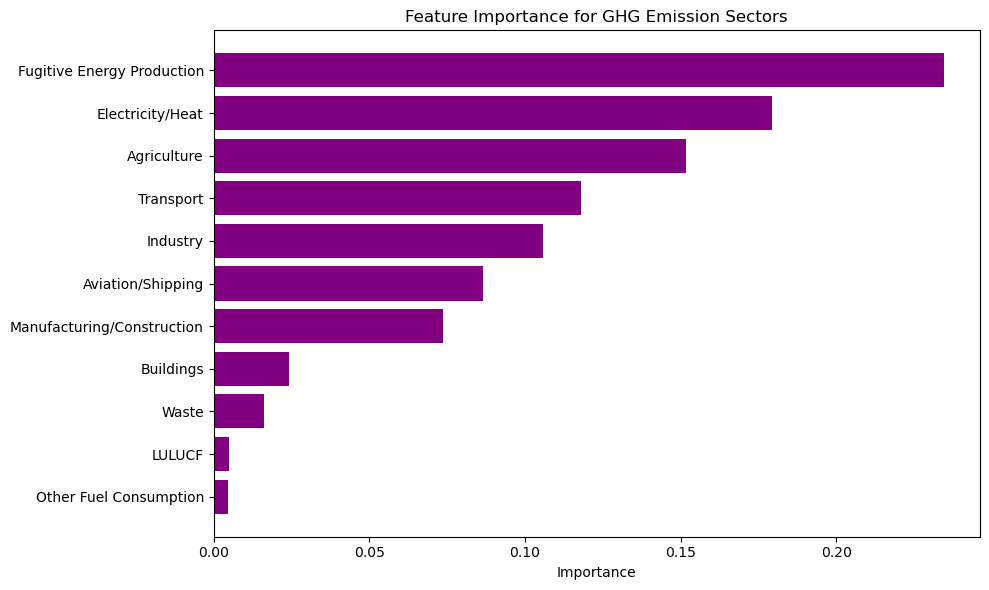

In [286]:
# Set up df for machine learning alg 
Feature_Sector = World_Emissions.drop(['Year'], axis=1)

Feature_Sector['Total_Emission'] = Feature_Sector.sum(axis=1)

# Choosing the target variable
target = 'Total_Emission'

# Defining the features (all other columns except the target of Total_Emisison)
features = Feature_Sector.drop(columns=[target])

# Create X (features) and y (target)
X = features
y = Feature_Sector[target]

# Instantiate the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a dataframe to view the importance values
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importance
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importance for GHG Emission Sectors')
plt.gca().invert_yaxis()  # display the highest importance on top
plt.tight_layout()
plt.show()

In [230]:
sector_emission

,Entity,Code,Year,Greenhouse gas emissions from agriculture,Greenhouse gas emissions from land use change and forestry,Greenhouse gas emissions from waste,Greenhouse gas emissions from buildings,Greenhouse gas emissions from industry,Greenhouse gas emissions from manufacturing and construction,Greenhouse gas emissions from transport,Greenhouse gas emissions from electricity and heat,Fugitive emissions of greenhouse gases from energy production,Greenhouse gas emissions from other fuel combustion,Greenhouse gas emissions from bunker fuels
0,Afghanistan,AFG,1990,8069999.5,-2390000.0,1230000.0,129999.99,50000.0,570000.0,970000.0,320000.0,280000.0,0.0,20000.00
1,Afghanistan,AFG,1991,8390000.0,-2390000.0,1320000.0,140000.00,60000.0,530000.0,930000.0,300000.0,240000.0,0.0,20000.00
2,Afghanistan,AFG,1992,8400000.0,-2390000.0,1400000.0,150000.00,60000.0,390000.0,740000.0,200000.0,200000.0,0.0,20000.00
3,Afghanistan,AFG,1993,8480000.0,-2390000.0,1490000.0,160000.00,60000.0,380000.0,740000.0,200000.0,160000.0,0.0,20000.00
4,Afghanistan,AFG,1994,8520000.0,-2390000.0,1580000.0,160000.00,60000.0,360000.0,730000.0,190000.0,120000.0,0.0,20000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6555,Zimbabwe,ZWE,2017,10780000.0,87290000.0,2540000.0,3600000.00,1680000.0,1260000.0,2069999.9,5130000.0,700000.0,410000.0,129999.99
6556,Zimbabwe,ZWE,2018,10870000.0,87380000.0,2590000.0,3610000.00,1830000.0,1560000.0,2710000.0,5430000.0,710000.0,480000.0,160000.00
6557,Zimbabwe,ZWE,2019,10620000.0,87330000.0,2640000.0,3530000.00,1810000.0,1630000.0,2320000.0,5020000.0,730000.0,440000.0,160000.00
6558,Zimbabwe,ZWE,2020,9760000.0,87210000.0,2690000.0,3650000.00,1900000.0,1420000.0,1580000.0,3870000.0,750000.0,500000.0,60000.00


In [231]:
# Setting up a dataframe for 3 main countries/regions 

USA = sector_emission[sector_emission['Entity'] == 'United States']
EU = sector_emission[sector_emission['Entity'] == 'European Union (27)']
China = sector_emission[sector_emission['Entity'] == 'China']

Country_Emission = pd.concat([USA, EU, China], ignore_index = True)

Country_Emission = Country_Emission.rename(columns={"Greenhouse gas emissions from agriculture": "Agriculture", 
                                "Greenhouse gas emissions from land use change and forestry": "LULUCF",
                                "Greenhouse gas emissions from waste" : "Waste",
                                "Greenhouse gas emissions from buildings" : "Buildings",
                                "Greenhouse gas emissions from industry" : "Industry",
                                "Greenhouse gas emissions from manufacturing and construction" : "Manufacturing/Construction",
                                "Greenhouse gas emissions from transport" : "Transport",
                                "Greenhouse gas emissions from electricity and heat" : "Electricity/Heat",
                                "Fugitive emissions of greenhouse gases from energy production" : "Fugitive Energy Production",
                                "Greenhouse gas emissions from other fuel combustion" : "Other Fuel Consumption",
                                "Greenhouse gas emissions from bunker fuels" : "Aviation/Shipping"})

columns_to_divide = [
    'Agriculture',
    'LULUCF',
    'Waste',
    'Buildings',
    'Industry',
    'Manufacturing/Construction',
    'Transport',
    'Electricity/Heat',
    'Fugitive Energy Production',
    'Other Fuel Consumption',
    'Aviation/Shipping'
]

# Divide all values by 1e9 so it's in billions of tonnes
Country_Emission[columns_to_divide] = Country_Emission[columns_to_divide] / 1e9

In [232]:
Country_Emission

,Entity,Code,Year,Agriculture,LULUCF,Waste,Buildings,Industry,Manufacturing/Construction,Transport,Electricity/Heat,Fugitive Energy Production,Other Fuel Consumption,Aviation/Shipping
0,United States,USA,1990,0.35633,-0.40662,0.19934,0.54789,0.16471,0.60690,1.46860,2.17163,0.25056,0.06905,0.13208
1,United States,USA,1991,0.35262,-0.40662,0.20190,0.55771,0.15431,0.56929,1.44067,2.19174,0.25031,0.06718,0.13841
2,United States,USA,1992,0.36006,-0.40662,0.20208,0.56760,0.15731,0.52000,1.47286,2.28928,0.24913,0.05052,0.14537
3,United States,USA,1993,0.36119,-0.40677,0.20022,0.59334,0.16057,0.53452,1.49704,2.34806,0.23966,0.04525,0.13374
4,United States,USA,1994,0.37111,-0.40692,0.20052,0.58345,0.16551,0.53695,1.55122,2.37344,0.24434,0.04602,0.13141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,China,CHN,2017,0.68472,-0.64764,0.19161,0.57410,1.12859,2.70948,0.90130,5.06066,0.45350,0.20022,0.06211
92,China,CHN,2018,0.67422,-0.64735,0.19757,0.53490,1.15009,2.80277,0.97644,5.40805,0.47812,0.17798,0.06944
93,China,CHN,2019,0.62750,-0.64728,0.20354,0.49955,1.21339,2.80636,0.97038,5.61874,0.49691,0.16450,0.06980
94,China,CHN,2020,0.63255,-0.64724,0.20950,0.49358,1.25249,2.86383,0.92688,5.71432,0.50993,0.16383,0.05502


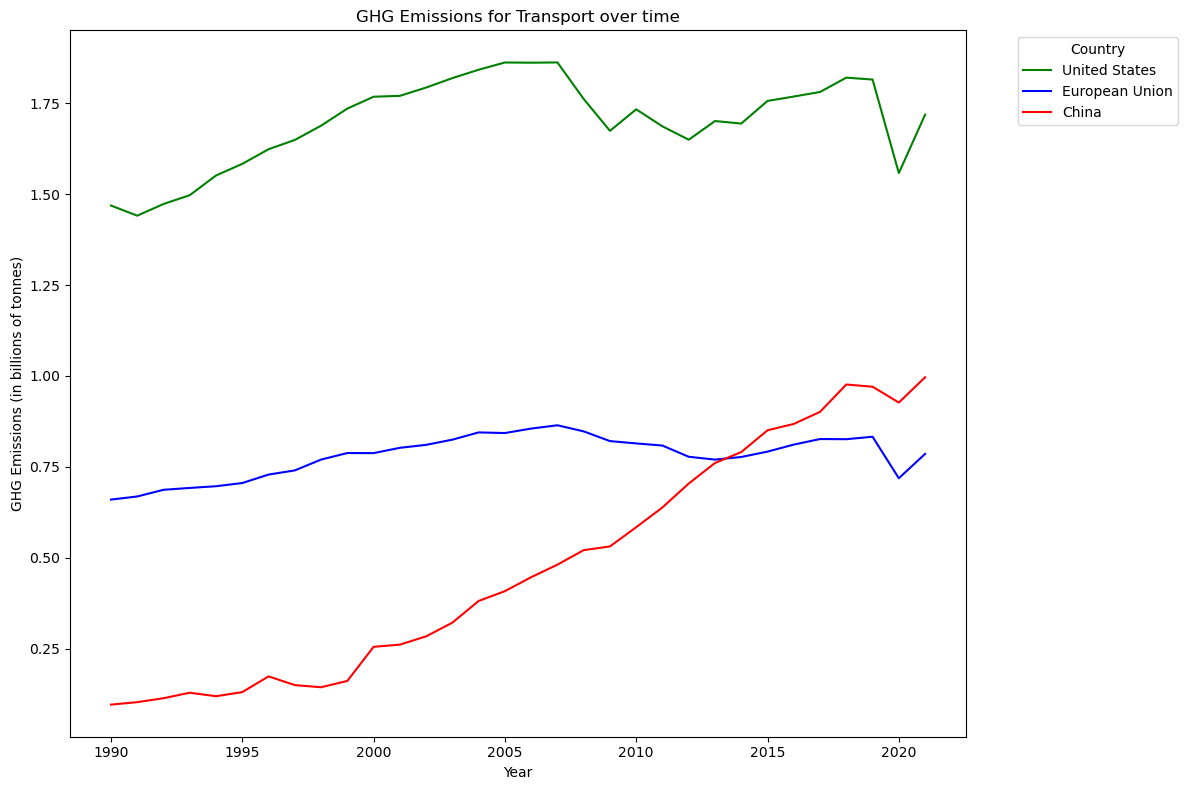

In [233]:
sector = 'Transport'

# filtering the data
USA = Country_Emission[Country_Emission['Entity'] == 'United States']
EU = Country_Emission[Country_Emission['Entity'] == 'European Union (27)']
China = Country_Emission[Country_Emission['Entity'] == 'China']

# Set Year as the X-axis
USA_plot = USA.set_index('Year')[sector]
EU_plot = EU.set_index('Year')[sector]
China_plot = China.set_index('Year')[sector]

# Create the line plot
plt.figure(figsize=(12, 8))
plt.plot(USA_plot.index, USA_plot, label='United States', color='green')
plt.plot(EU_plot.index, EU_plot, label='European Union', color='blue')
plt.plot(China_plot.index, China_plot, label='China', color='red')

# Adding the labels, title, and legend
plt.xlabel('Year')
plt.ylabel('GHG Emissions (in billions of tonnes)')
plt.title(f'GHG Emissions for {sector} over time')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()

# Show the plot
plt.show()

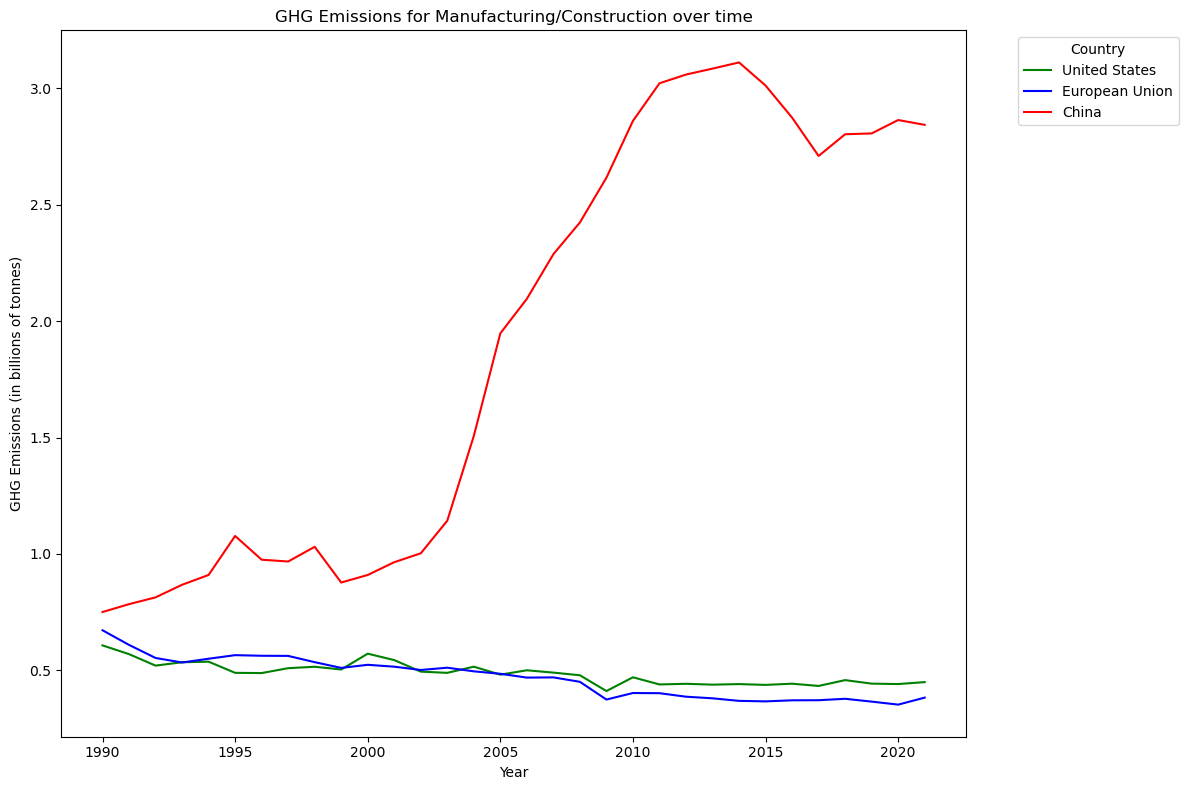

In [234]:
# Repeating for 2 other sectors

sector = 'Manufacturing/Construction'

USA = Country_Emission[Country_Emission['Entity'] == 'United States']
EU = Country_Emission[Country_Emission['Entity'] == 'European Union (27)']
China = Country_Emission[Country_Emission['Entity'] == 'China']

USA_plot = USA.set_index('Year')[sector]
EU_plot = EU.set_index('Year')[sector]
China_plot = China.set_index('Year')[sector]

plt.figure(figsize=(12, 8))
plt.plot(USA_plot.index, USA_plot, label='United States', color='green')
plt.plot(EU_plot.index, EU_plot, label='European Union', color='blue')
plt.plot(China_plot.index, China_plot, label='China', color='red')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (in billions of tonnes)')
plt.title(f'GHG Emissions for {sector} over time')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()

plt.show()

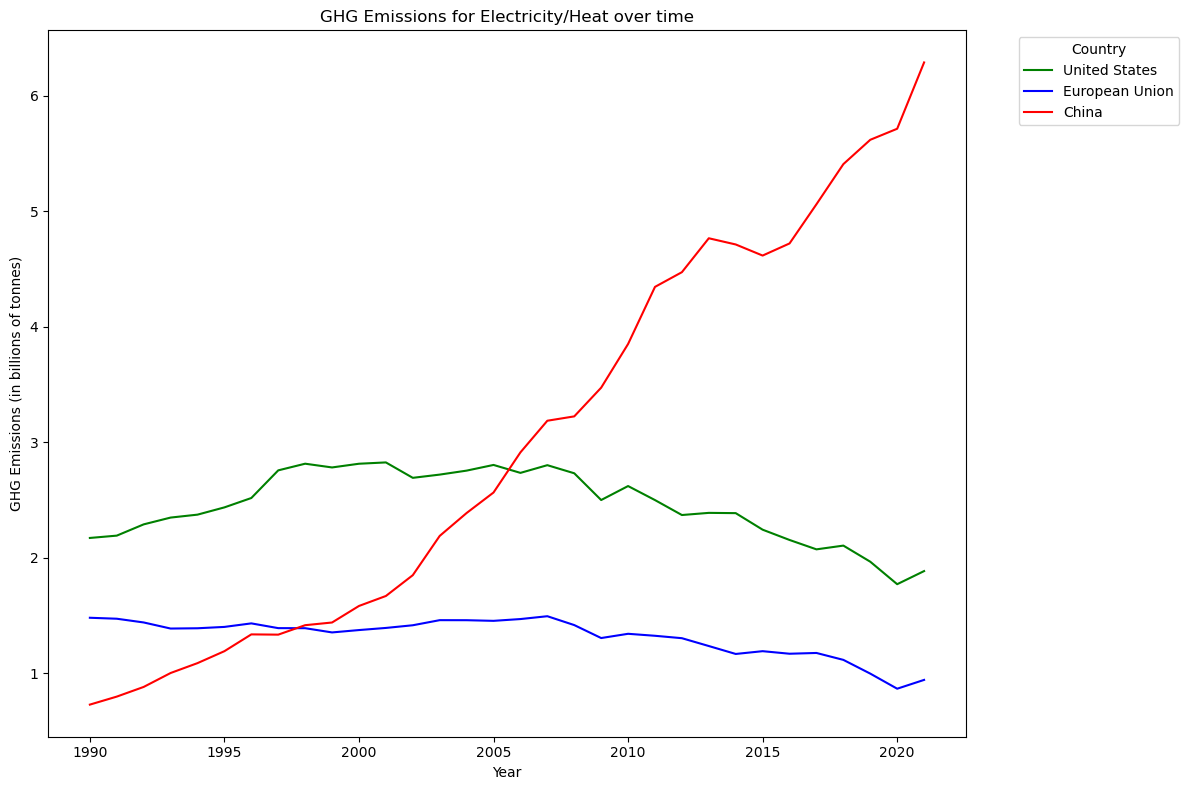

In [235]:
sector = 'Electricity/Heat'

USA = Country_Emission[Country_Emission['Entity'] == 'United States']
EU = Country_Emission[Country_Emission['Entity'] == 'European Union (27)']
China = Country_Emission[Country_Emission['Entity'] == 'China']

USA_plot = USA.set_index('Year')[sector]
EU_plot = EU.set_index('Year')[sector]
China_plot = China.set_index('Year')[sector]

plt.figure(figsize=(12, 8))
plt.plot(USA_plot.index, USA_plot, label='United States', color='green')
plt.plot(EU_plot.index, EU_plot, label='European Union', color='blue')
plt.plot(China_plot.index, China_plot, label='China', color='red')

plt.xlabel('Year')
plt.ylabel('GHG Emissions (in billions of tonnes)')
plt.title(f'GHG Emissions for {sector} over time')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.tight_layout()

plt.show()

In [236]:
# Export useful dataframes as csvs

CO2_emission.to_csv('CO2_Emission.csv', index = False)
CH4_emission.to_csv('CH4_Emission.csv', index = False)
N2O_emission.to_csv('N2O_Emission.csv', index = False)
sector_emission.to_csv('Emissions_by_Sector.csv', index = False)
World_Emissions.to_csv('Global_Emissions_by_Sector.csv', index = False)
Country_Emission.to_csv('China_EU_UnitedStates_by_Sector.csv', index = False)